#  <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #1a3d52; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #ffe81c; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;"> Titanic - Machine Learning </p>
    

# The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).



# <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #1a3d52; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #ffe81c; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;"> Readers data</p>

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,recall_score,precision_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('/kaggle/input/titanic/train.csv')


In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #058BDD; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #F0FF00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;"> is null</p>

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df=df.drop(['Cabin'],axis=1)

In [9]:
df=df.drop(['Name'],axis=1)

# <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #058BDD; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #F0FF00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;">methode the null value</p>

In [10]:
def null():
    s=(df.isna().sum())/len(df)
    return s

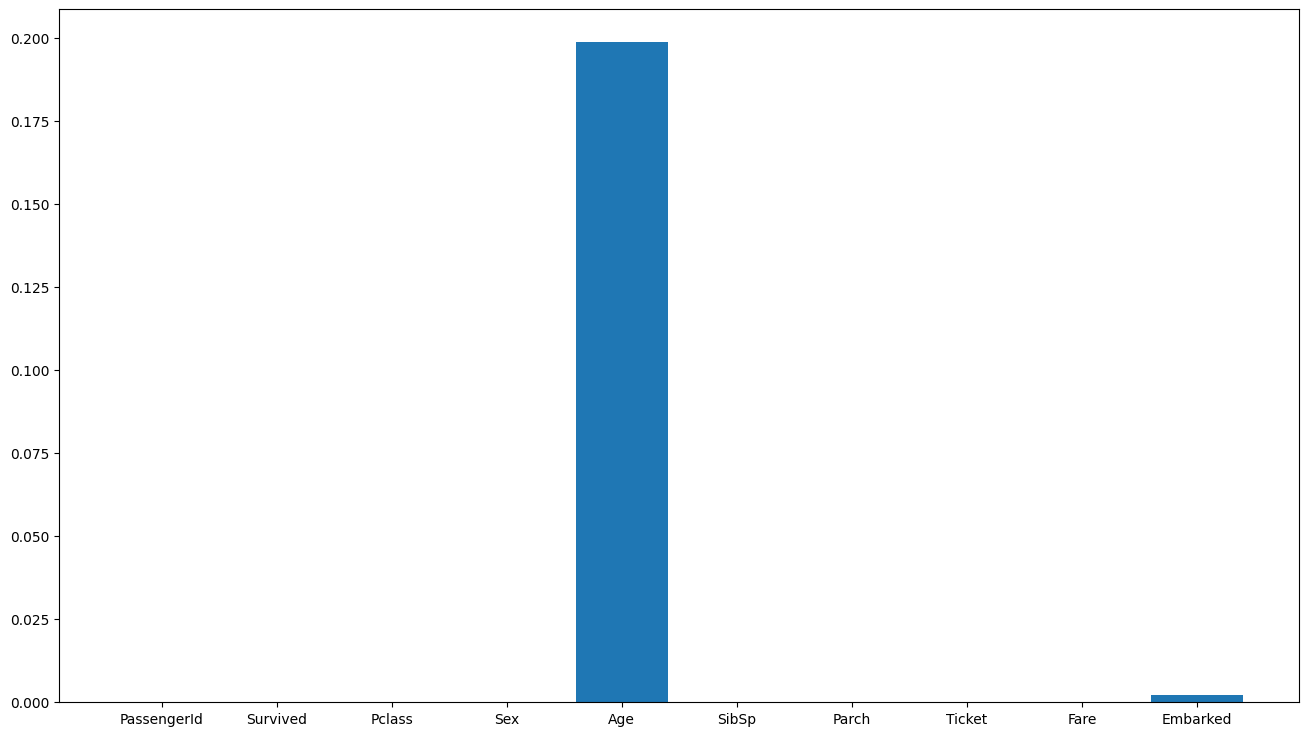

In [11]:
fig=plt.subplots(figsize=(16,9),dpi=100)
n=null()
plt.bar(n.index,n.values)
plt.show()

In [12]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,female,38.0,0,0,113572,80.0,NaN
829,830,1,1,female,62.0,0,0,113572,80.0,NaN


In [13]:
df['Embarked']=df['Embarked'].dropna()

In [14]:
df=df.fillna(df['Age'].median())

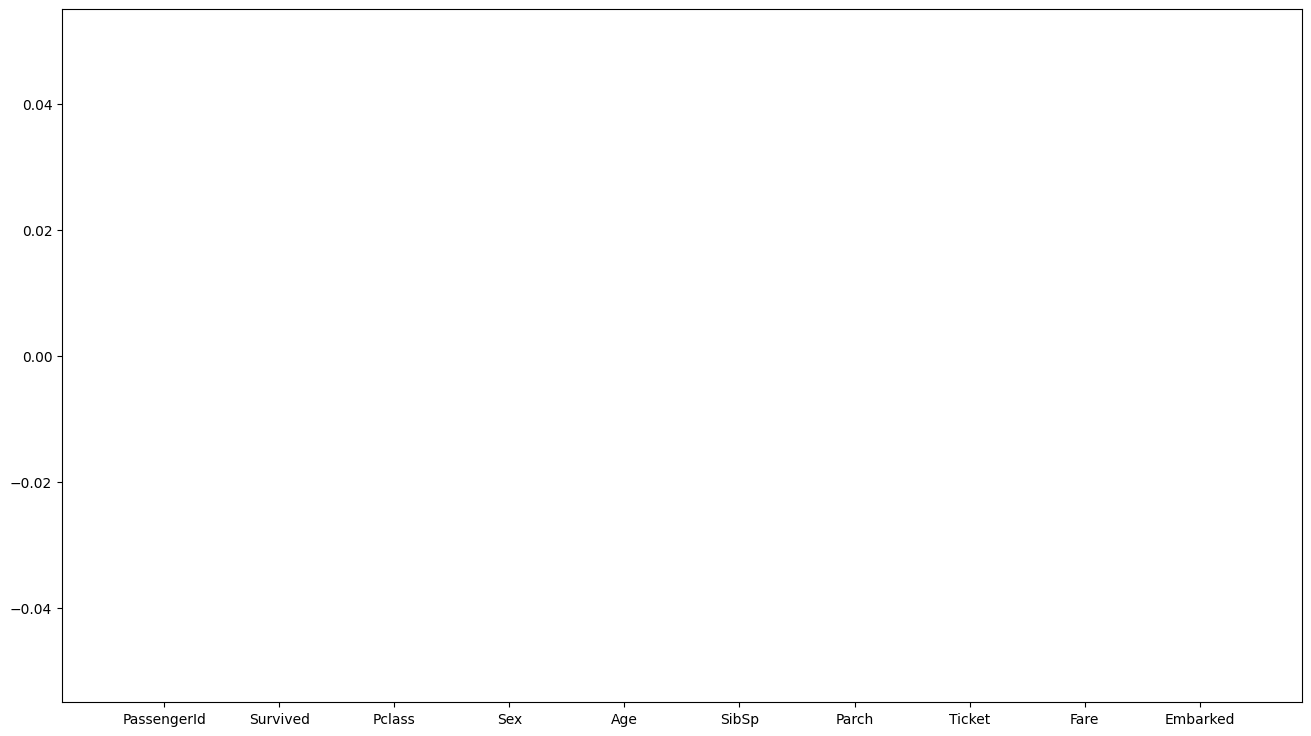

In [15]:
fig=plt.subplots(figsize=(16,9),dpi=100)
df=df.fillna(df['Age'].median())
n=null()
plt.bar(n.index,n.values)
plt.show()


 #  <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #058BDD; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #F0FF00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;">Encoding</p>

In [16]:
obj=df.select_dtypes(include='object')
num=df.select_dtypes(exclude='object')

In [17]:
obj

,Sex,Ticket,Embarked
0,male,A/5 21171,S
1,female,PC 17599,C
2,female,STON/O2. 3101282,S
3,female,113803,S
4,male,373450,S
...,...,...,...
886,male,211536,S
887,female,112053,S
888,female,W./C. 6607,S
889,male,111369,C


In [18]:
obj['Sex']=pd.get_dummies(obj['Sex'],drop_first=True)

In [19]:
obj

,Sex,Ticket,Embarked
0,True,A/5 21171,S
1,False,PC 17599,C
2,False,STON/O2. 3101282,S
3,False,113803,S
4,True,373450,S
...,...,...,...
886,True,211536,S
887,False,112053,S
888,False,W./C. 6607,S
889,True,111369,C


In [20]:
obj['Sex']=obj['Sex'].map({True:1,False:0})

In [21]:
obj['Embarked']=str(obj['Embarked'])

In [22]:

map_Embarked={
    'S':0,
    'C':1,
    'Q':2,
    
}

In [23]:
obj['Embarked']=df['Embarked'].map(map_Embarked)

In [24]:
f=LabelEncoder()
f.fit(obj['Ticket'])
obj['Ticket']=f.transform(obj['Ticket'])
obj

,Sex,Ticket,Embarked
0,1,523,0.0
1,0,596,1.0
2,0,669,0.0
3,0,49,0.0
4,1,472,0.0
...,...,...,...
886,1,101,0.0
887,0,14,0.0
888,0,675,0.0
889,1,8,1.0


In [25]:
df=pd.concat([num,obj],axis=1)

#   <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #058BDD; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #F0FF00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;">balance data</p>

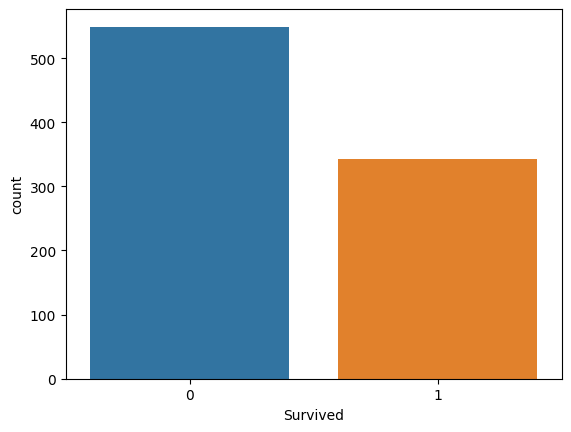

In [26]:
sns.countplot(data=df,x='Survived')
plt.show()

#   <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #058BDD; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #F0FF00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;">check outlier</p>


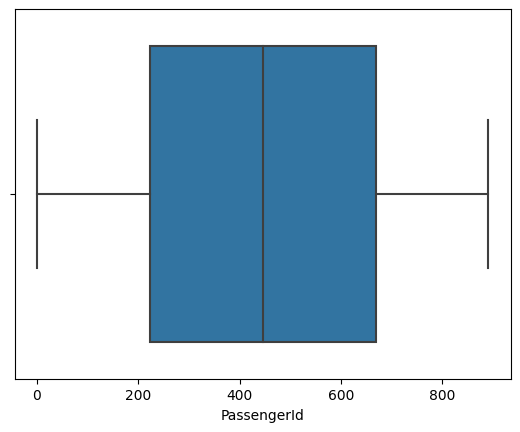

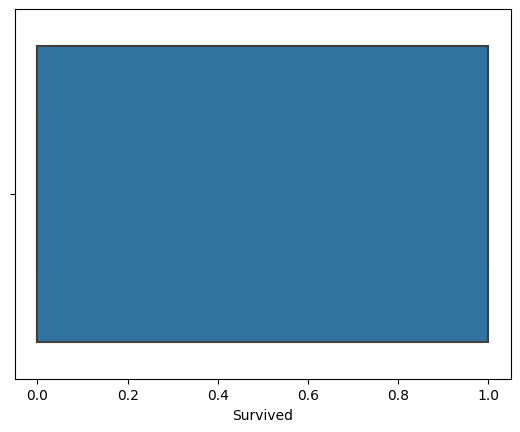

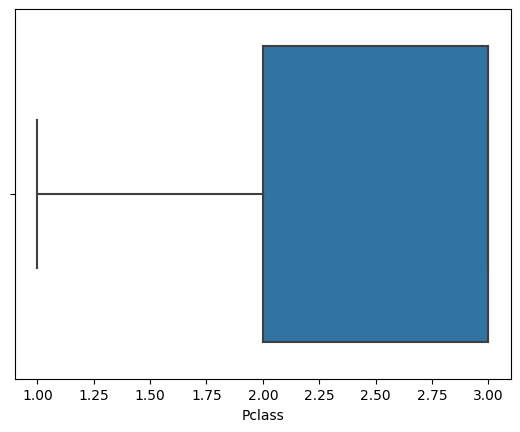

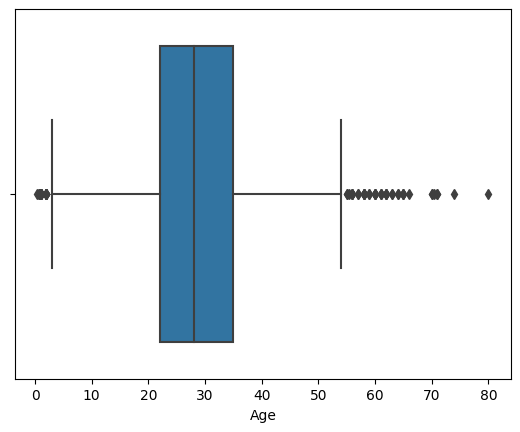

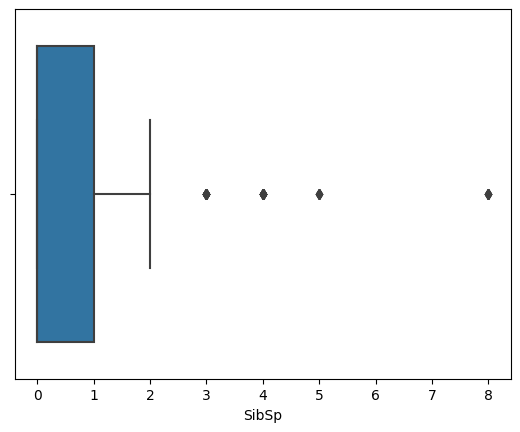

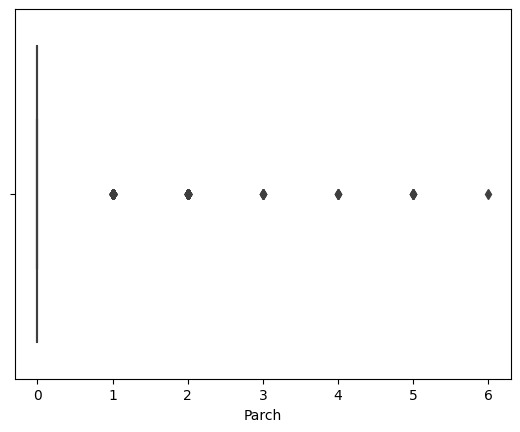

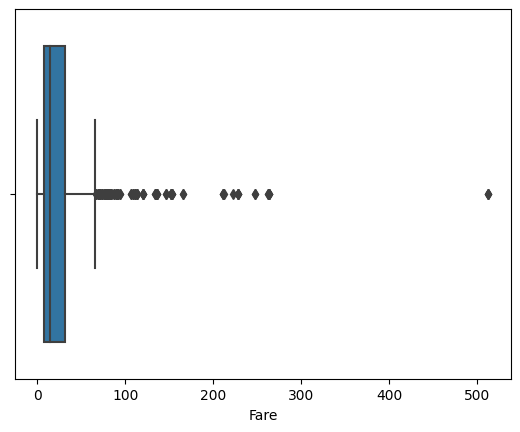

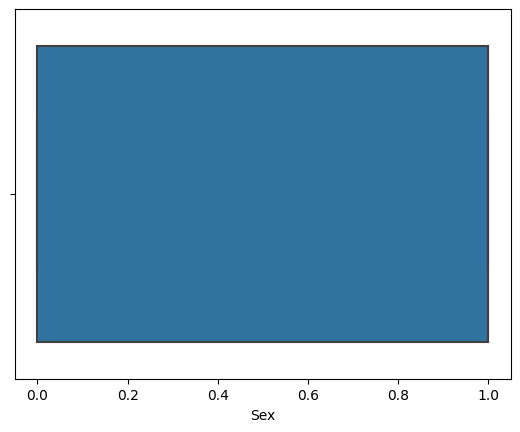

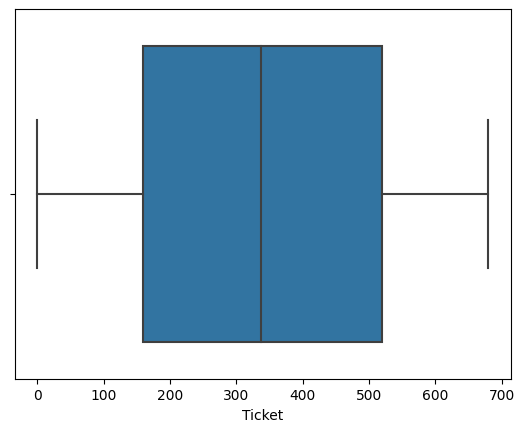

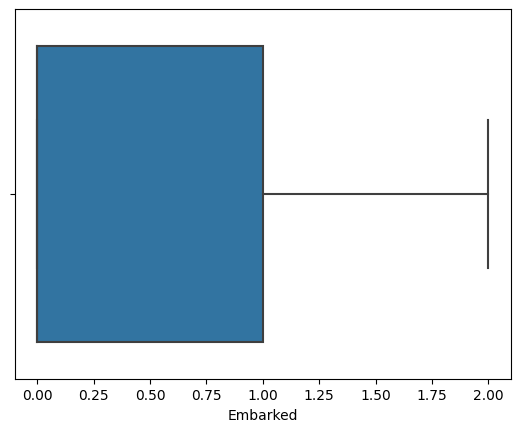

In [27]:

col=df.columns

for i in col:
    sns.boxplot(data=df,x=i)
    plt.show()

In [28]:
df=df.drop('Parch',axis=1)

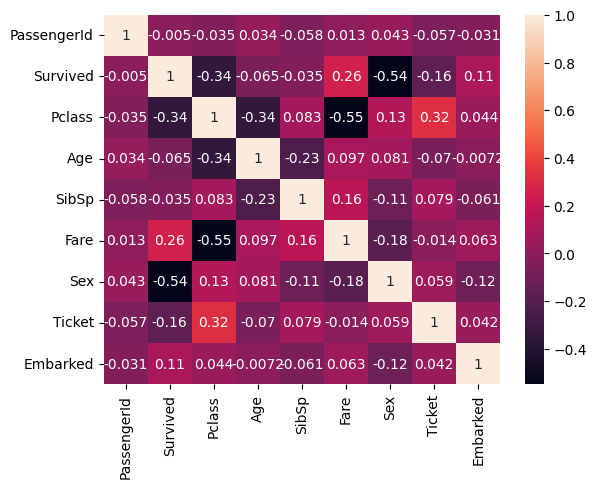

In [29]:
sns.heatmap(df.corr(),annot=True)
plt.show()


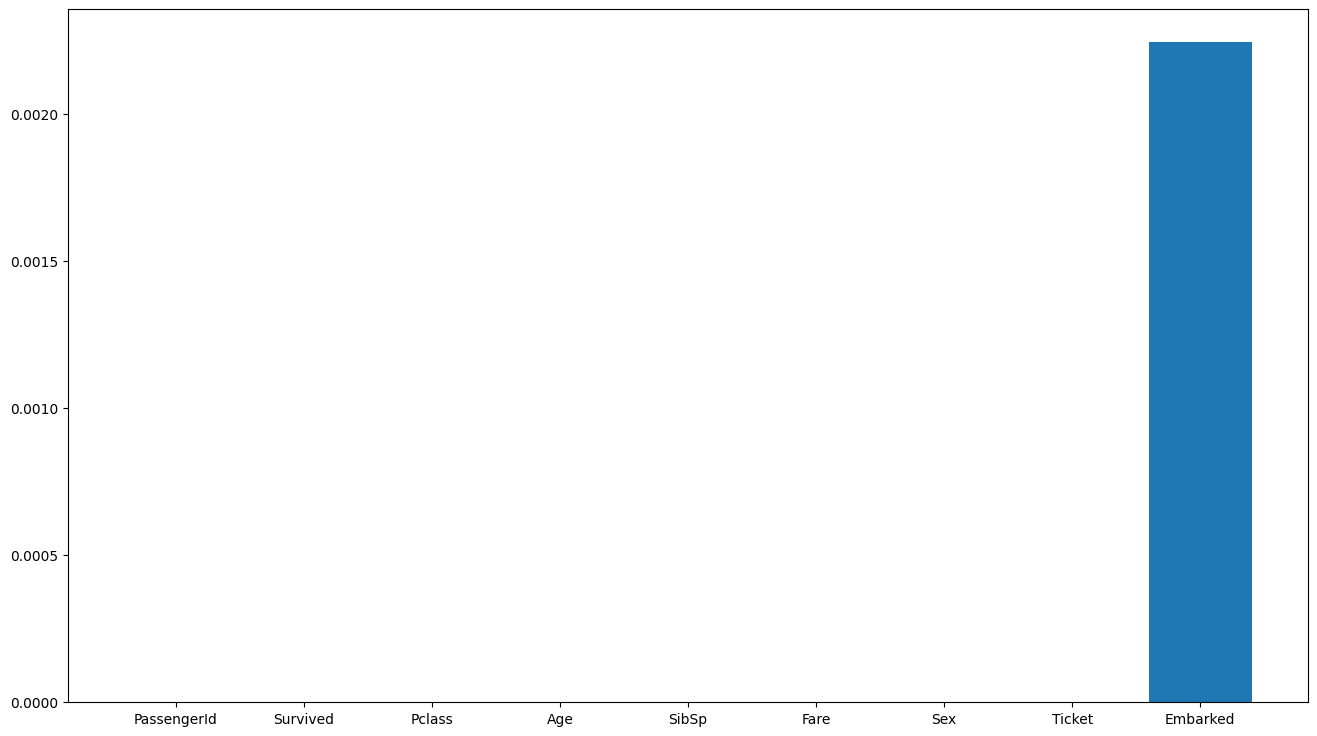

In [30]:
fig=plt.subplots(figsize=(16,9),dpi=100)
n=null()
plt.bar(n.index,n.values)
plt.show()

In [31]:
df=df[df['Embarked'].notnull()]

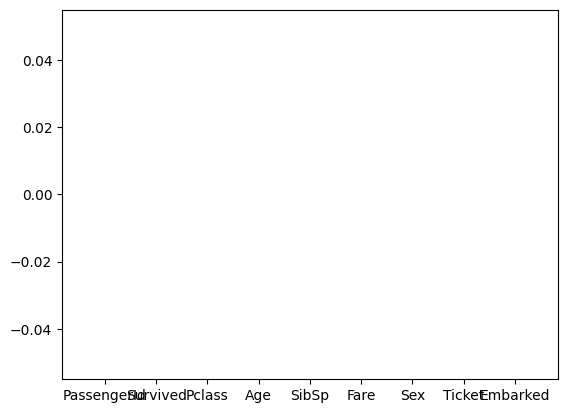

In [32]:
n=null()
plt.bar(n.index,n.values)
plt.show()

#   <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #058BDD; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #F0FF00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;">blind model machine learning</p>


In [33]:
df=df.drop('PassengerId',axis=1)

In [34]:
x=df.drop('Survived',axis=1)
y=df['Survived']

#   <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #058BDD; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #F0FF00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;">Train and test split</p>


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

#   <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #058BDD; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #F0FF00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;">StandardScaler</p>

In [36]:
scal=StandardScaler()
x_train=scal.fit_transform(x_train)
x_test=scal.transform(x_test)

#    <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #058BDD; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #F0FF00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;">Grid Search in Attempt for Better Model</p>

In [37]:
model=RandomForestClassifier()
parmet={
        'criterion':['gini', 'entropy', 'log_loss'],
        'max_features':['sqrt', 'log2'],
        'class_weight':['balanced', 'balanced_subsample'],
        'n_estimators':[10,20,50,60,100,150,200],
       
        

}

In [38]:
mode_gred=GridSearchCV(estimator=model,param_grid=parmet,cv=5,verbose=0)

In [39]:
mode_gred.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 20, 50, 60, 100, 150, 200]})

#  <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #058BDD; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #F0FF00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;">Evaluation</p>

In [40]:
mode_gred.best_params_

{'class_weight': 'balanced',
 'criterion': 'log_loss',
 'max_features': 'sqrt',
 'n_estimators': 60}

In [41]:
pred_y=mode_gred.predict(x_test)

In [42]:
confusion_matrix(y_test,pred_y)

array([[94, 15],
       [19, 50]])

In [43]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       109
           1       0.77      0.72      0.75        69

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178



In [44]:
precision_score(y_test,pred_y)

0.7692307692307693

In [45]:
recall_score(y_test,pred_y)

0.7246376811594203

#  <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #058BDD; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #F0FF00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;">Final Model</p>

In [46]:
scal=StandardScaler()

x=scal.fit_transform(x)

In [47]:
model=RandomForestClassifier(class_weight='balanced',criterion='log_loss',max_features='log2',n_estimators=150)
model.fit(x,y)

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_features='log2', n_estimators=150)

#  <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #058BDD; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #F0FF00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;">read test data</p>

In [48]:
x=pd.read_csv('/kaggle/input/titanic/test.csv')

In [49]:
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [50]:
df

,Survived,Pclass,Age,SibSp,Fare,Sex,Ticket,Embarked
0,0,3,22.0,1,7.2500,1,523,0.0
1,1,1,38.0,1,71.2833,0,596,1.0
2,1,3,26.0,0,7.9250,0,669,0.0
3,1,1,35.0,1,53.1000,0,49,0.0
4,0,3,35.0,0,8.0500,1,472,0.0
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,13.0000,1,101,0.0
887,1,1,19.0,0,30.0000,0,14,0.0
888,0,3,28.0,1,23.4500,0,675,0.0
889,1,1,26.0,0,30.0000,1,8,1.0


In [51]:
x.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [52]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [53]:
x.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [54]:
x=x.drop(['Cabin'],axis=1)
x=x.drop(['Name'],axis=1)

In [55]:
def null():
    s=(x.isna().sum())/len(x)
    return s

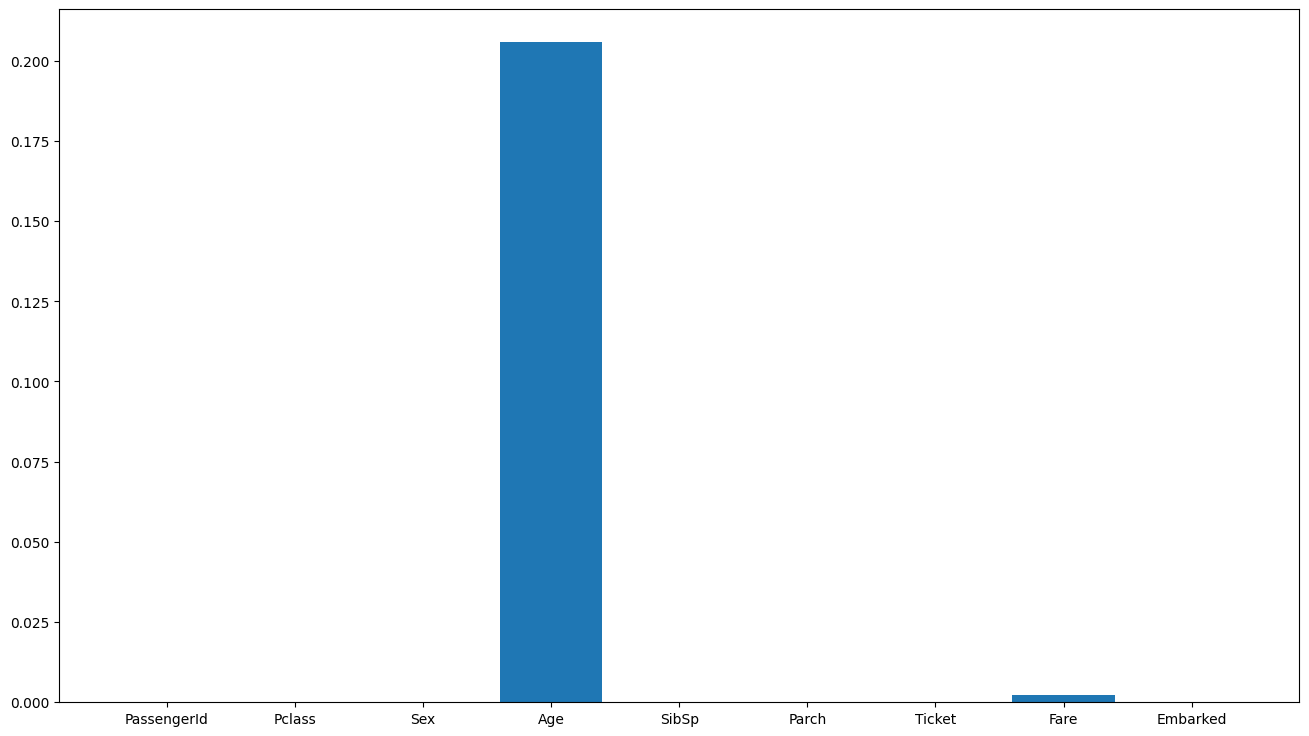

In [56]:
fig=plt.subplots(figsize=(16,9),dpi=100)
n=null()
plt.bar(n.index,n.values)
plt.show()

In [57]:
x=x.fillna(x['Age'].median())

In [58]:
obj=x.select_dtypes(include='object')
num=x.select_dtypes(exclude='object')

In [59]:
obj['Sex']=pd.get_dummies(obj['Sex'],drop_first=True)

In [60]:
obj['Sex']=obj['Sex'].map({True:1,False:0})

In [61]:
obj['Embarked']=str(obj['Embarked'])

In [62]:
map_Embarked={
    'S':0,
    'C':1,
    'Q':2,
    
}

In [63]:
obj['Embarked']=x['Embarked'].map(map_Embarked)

In [64]:

f=LabelEncoder()
f.fit(obj['Ticket'])
obj['Ticket']=f.transform(obj['Ticket'])
obj

,Sex,Ticket,Embarked
0,1,152,2
1,0,221,0
2,1,73,2
3,1,147,0
4,0,138,0
...,...,...,...
413,1,267,0
414,0,324,1
415,1,346,0
416,1,220,0


In [65]:

x=pd.concat([num,obj],axis=1)

In [66]:
x=x.drop('Parch',axis=1)

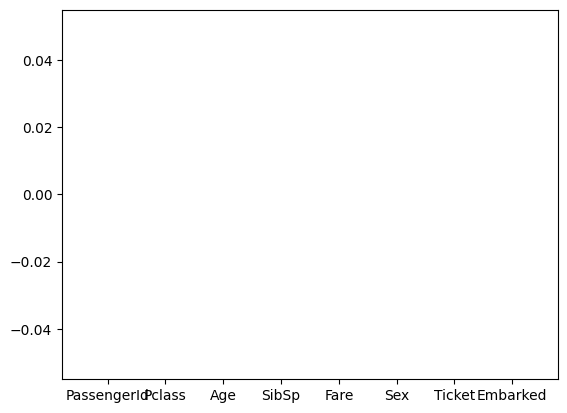

In [67]:
n=null()
plt.bar(n.index,n.values)
plt.show()

In [68]:
x=x.drop('PassengerId',axis=1)

In [69]:
x=scal.transform(x)

In [70]:
pred_y=model.predict(x)

In [71]:
r=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [72]:
y=r['Survived']

In [73]:
print(confusion_matrix(y,pred_y))

[[245  21]
 [ 22 130]]


In [74]:
print(classification_report(y,pred_y))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       266
           1       0.86      0.86      0.86       152

    accuracy                           0.90       418
   macro avg       0.89      0.89      0.89       418
weighted avg       0.90      0.90      0.90       418



In [75]:
print(precision_score(y,pred_y))

0.8609271523178808


In [76]:
print(recall_score(y,pred_y))

0.8552631578947368


In [77]:
r['y_predict']=pred_y

In [78]:
r

,PassengerId,Survived,y_predict
0,892,0,0
1,893,1,0
2,894,0,0
3,895,0,0
4,896,1,1
...,...,...,...
413,1305,0,0
414,1306,1,1
415,1307,0,0
416,1308,0,0
